In [83]:
html_code ="""<div style="text-align: center; background-color: #f0f0f0; padding: 20px;">
    <h1 style="color: #333;">Titanic Dataset Challenge</h1>
</div>"""

HTML(html_code)

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML 

In [9]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [10]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [11]:
train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
train['Survived'].value_counts() #not an imbalanced data

Survived
0    549
1    342
Name: count, dtype: int64

# DATA-PREPROCESSING:

# since cabin has 687 missing values of 891 values, predicting those many values would cause the model to suffer.hence we would be dropping it 

In [13]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

# Filling the empty values:

In [16]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
train['Embarked'].fillna('S',inplace=True)

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [19]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [20]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [22]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [23]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [24]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [25]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


# Start with the EDA

In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [29]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [30]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [31]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [32]:
train.groupby(['Fare'])['Survived'].mean()

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Name: Survived, Length: 248, dtype: float64

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\3078857304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.

<Axes: xlabel='Age', ylabel='Density'>

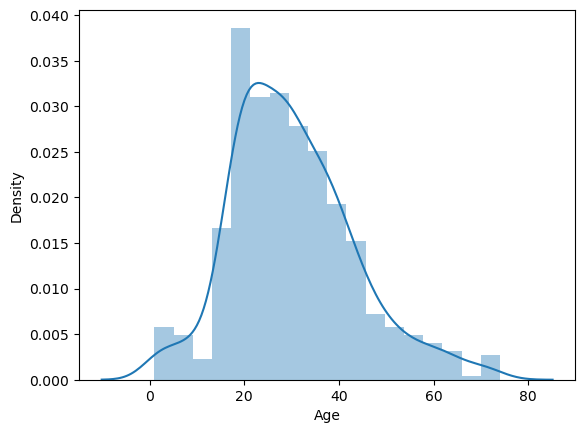

In [33]:
sns.distplot(train['Age'][train['Survived']==0])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\1253775620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: xlabel='Fare', ylabel='Density'>

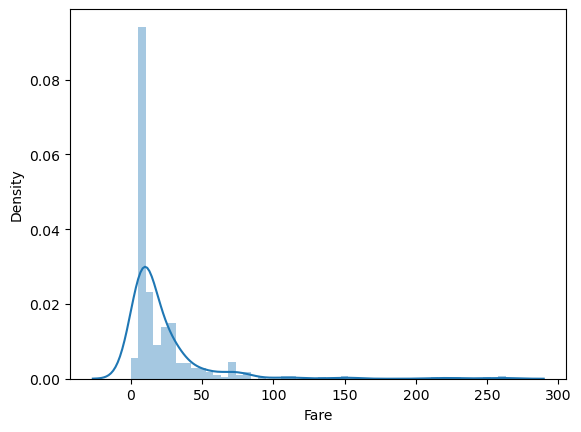

In [34]:
sns.distplot(train['Fare'][train['Survived']==0])

In [35]:
train.drop(columns=['Ticket'],inplace=True)

In [36]:
test.drop(columns=['Ticket'],inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\1842426008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SibSp'][train['Survived']==0])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mod

<Axes: xlabel='Parch', ylabel='Density'>

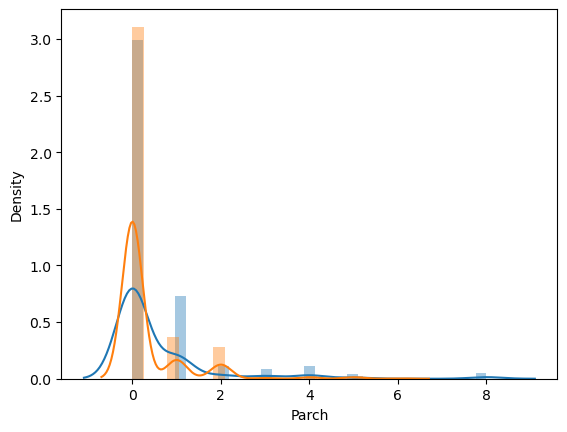

In [37]:
sns.distplot(train['SibSp'][train['Survived']==0])
sns.distplot(train['Parch'][train['Survived']==0])

In [38]:
train['Family']=train['SibSp']+train['Parch']+1

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64

In [40]:
train['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

C:\Users\Harsh\AppData\Local\Temp\ipykernel_16760\1090754038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Family'][train['Survived']==1])
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mo

<Axes: xlabel='Family', ylabel='Density'>

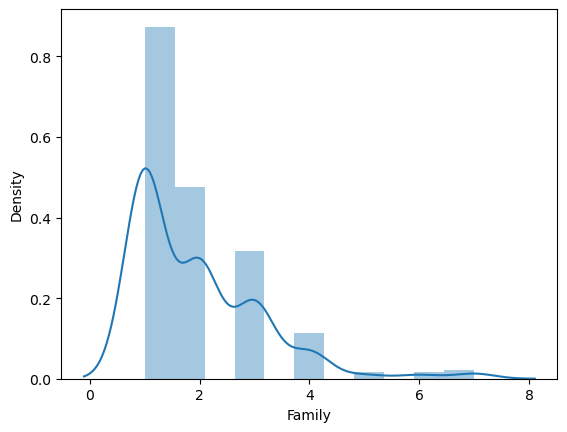

In [41]:
sns.distplot(train['Family'][train['Survived']==1])

In [42]:
train.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64

In [44]:
test['Family']=test['SibSp']+test['Parch']+1

In [45]:
def calculate(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"

In [46]:
train['Family_size']=train['Family'].apply(calculate)

In [47]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [48]:
test['Family_size']=test['Family'].apply(calculate)

In [49]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [50]:
train.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [51]:
test.drop(columns=['SibSp','Parch','Family'],inplace=True)

In [52]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [53]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [54]:
PassengerID=test['PassengerId'].values

In [55]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [56]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [57]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [58]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [59]:
train.shape

(891, 10)

In [60]:
test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [61]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [62]:
test.shape

(418, 9)

In [64]:
X=train.iloc[:,1:].values
Y=train.iloc[:,0].values

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [67]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [68]:
y_pred=classifier.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.8212290502793296

In [70]:
Xf=test.iloc[:,:].values

In [71]:
y_final=classifier.predict(Xf)

In [72]:
y_final.shape

(418,)

In [73]:
PassengerID.shape

(418,)

In [74]:
final=pd.DataFrame()

In [75]:
final

""


In [76]:
final['passengerID']=PassengerID
final['survival']=y_final

In [77]:
final

,passengerID,survival
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [78]:
final.to_csv('submission.csv',index=False)

In [ ]:
#END OF PROJECT: